# Loading the required modules

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from pandas.plotting import scatter_matrix
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Loading the datasets

In [2]:
iris_dataset = datasets.load_iris()

# Splitting the dataset

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset["data"],
    iris_dataset["target"],
    random_state=43,
    test_size=0.33,
    shuffle=True,
)

# Training the classifier

In [4]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

# Predicting

In [5]:
y_pred = knn.predict(X_test)

# Evaluating the classifier

In [6]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [7]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


# Classification report

In [8]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



# Confusion matrix

In [9]:
cm = confusion_matrix(y_test, y_pred)

# Visualizing

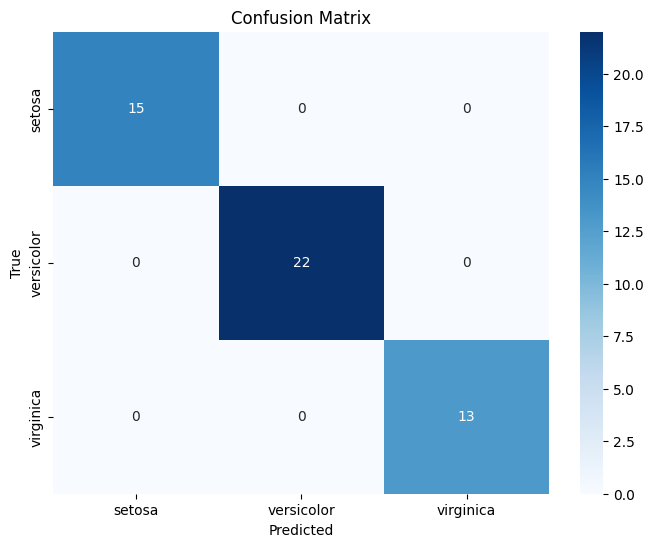

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris_dataset.target_names, yticklabels=iris_dataset.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Dsiplaying the prediction

In [11]:
print(f"Prediction: {y_pred}")
print("Predicted target name: {}".format(iris_dataset["target_names"][y_pred]))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Prediction: [0 0 2 1 2 0 2 1 1 1 0 1 2 0 1 1 0 0 2 2 0 0 0 2 2 2 0 1 0 0 1 0 1 1 2 2 1
 2 1 1 1 2 1 1 0 1 1 1 1 1]
Predicted target name: ['setosa' 'setosa' 'virginica' 'versicolor' 'virginica' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'virginica' 'setosa' 'versicolor' 'versicolor' 'setosa' 'setosa'
 'virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'virginica'
 'virginica' 'virginica' 'setosa' 'versicolor' 'setosa' 'setosa'
 'versicolor' 'setosa' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor']
Test set score: 1.00


In [12]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

In [13]:
print(iris_dataframe)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 6.3               2.5                4.9               1.5
1                 5.8               2.7                3.9               1.2
2                 6.7               3.1                4.7               1.5
3                 5.8               2.7                5.1               1.9
4                 5.4               3.4                1.7               0.2
..                ...               ...                ...               ...
95                6.6               2.9                4.6               1.3
96                5.1               3.7                1.5               0.4
97                5.0               3.3                1.4               0.2
98                5.6               2.9                3.6               1.3
99                6.2               2.2                4.5               1.5

[100 rows x 4 columns]


# create a scatter matrix from the dataframe, color by y_train

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

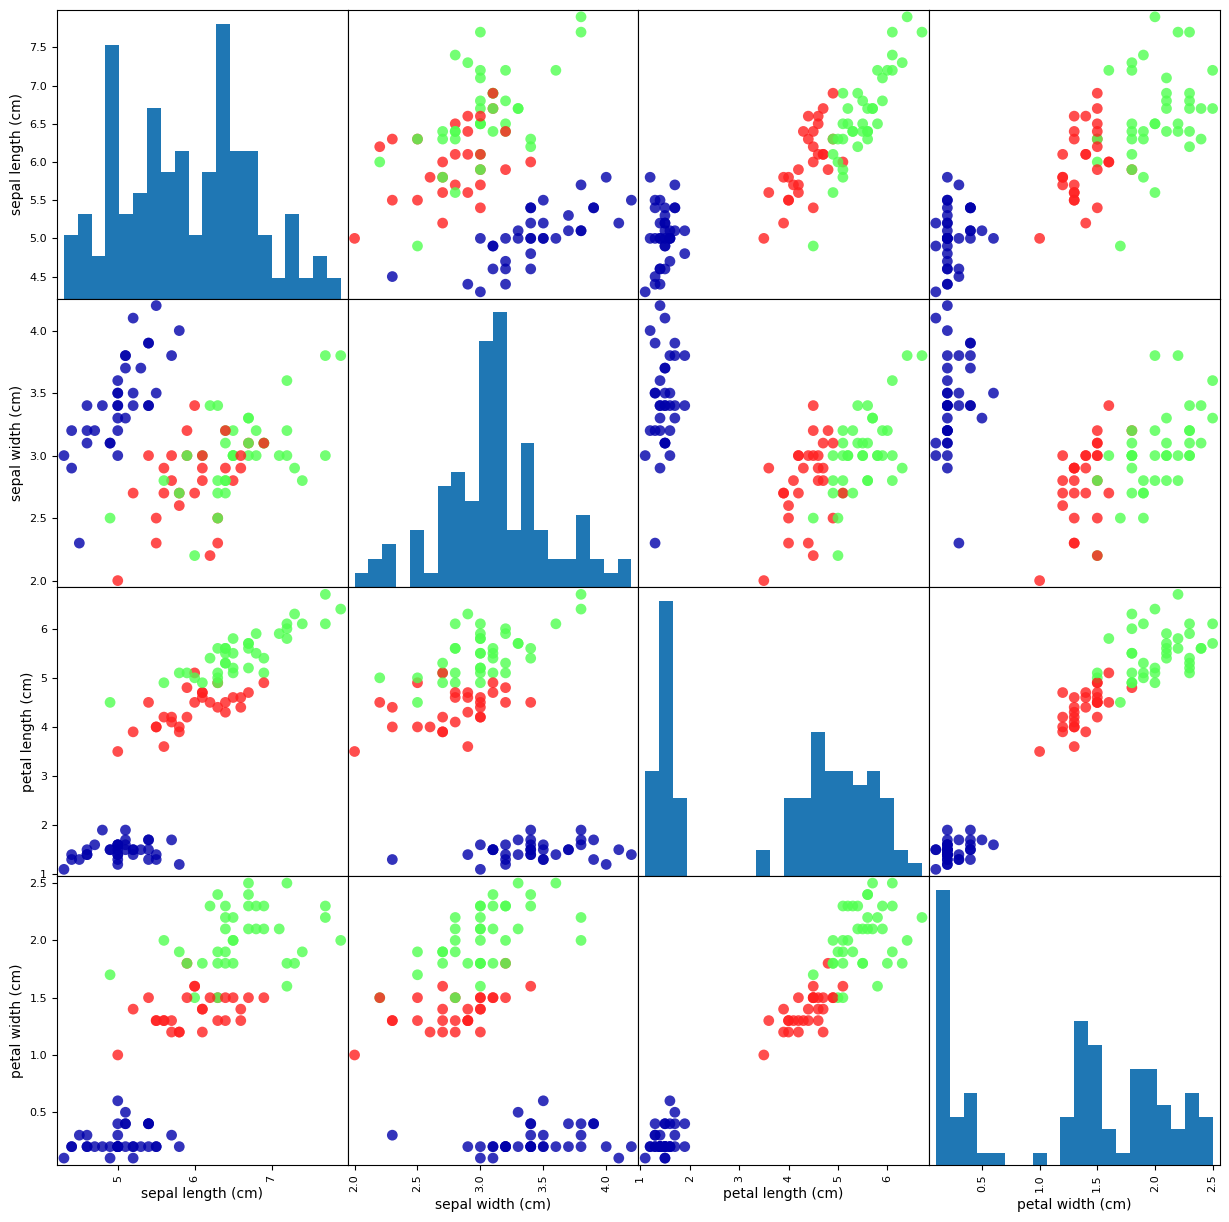

In [14]:
scatter_matrix(
    iris_dataframe,
    c=y_train,
    figsize=(15, 15),
    marker="o",
    hist_kwds={"bins": 20},
    s=60,
    alpha=0.8,
    cmap=mglearn.cm3,
)